# IMDb data from 2006 to 2016 analysis

## 1. Hypotheses:

### 1. Is there any correlation between the number of title words and the number of votes?
### 2. Did the most popular genre generated the most revenue in the given period?
### 3. Does the length of movies (in minutes) have a positive impact on the IMDb ratings?
### 4. Did the most popular director (taking into account IMDb rating and the number of votes) generated the most revenue (comparing witht the other directors?)
### 5. Does the actor (actress) that appeared the most times tend to appear in movies ranked higher?
### 6. Most

### 1.1. Dataset source: https://www.kaggle.com/PromptCloudHQ/imdb-data

# 2. Data analysis.

### 2.1. Libraries used:

In [565]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from skimage import data
from skimage import io

### 2.2. Importing the data in CSV format.

In [566]:
movies = pd.read_csv('IMDB-Movie-Data.csv')

### 2.3. Analysis of raw, uncleaned data.

In [567]:
movies # Original, raw data.

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0


In [568]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


### 2.4. Cleaning the data.
### 2.4.1. Finding the null values;
### 2.4.2. Dropping the duplicates;
### 2.4.3. Renaming the columns;
### 2.4.4. Dropping the null values.

In [569]:
movies.isnull().sum() # Finding the number of Null values in the dataset.

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [570]:
movies = movies_no_duplicates = movies.drop_duplicates() # Dropping the duplicates.

In [571]:
# Renaming the columns to make it easier to work with the data.
movies_renamed = movies.rename(columns={'Runtime (Minutes)' : 'Runtime', 'Revenue (Millions)' : 'Revenue_millions', 'Rating' : 'IMDb_rating'})
movies_renamed
movies = movies_renamed
movies.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,IMDb_rating,Votes,Revenue_millions,Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [572]:
movies_dropna = movies.dropna(how='any', subset = 'Revenue_millions') # Dropping null values of column 'Revenue'
movies_dropna
movies = movies_dropna
movies.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,IMDb_rating,Votes,Revenue_millions,Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [573]:
movies_nona = movies.dropna(how='any', subset = 'Metascore') # Dropping null values of column 'Metascore' 
movies_nona
movies = movies_nona
movies.head(2) # Cleaned: removed duplicates, null values

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,IMDb_rating,Votes,Revenue_millions,Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0


### 2.5. Adding new columns to expand the dataset in order implement new observations.

In [574]:
def word_count(txt):
    return len(txt.split())

In [630]:
# Adding new column to find out the total number of words in each of the movie title.
movies['Title_words'] = movies['Title'].map(word_count)
movies.head(5)

,Revenue_millions,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,IMDb_rating,Votes,Metascore,Title_words,IMDb_rating_Metascore,Main_genres
0,936.63,51,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,Daisy Ridley,2015,136,8.1,661608,81.0,8,89.1,Action
1,760.51,88,Avatar,"Action,Adventure,Fantasy",A paraplegic marine dispatched to the moon Pan...,James Cameron,Sam Worthington,2009,162,7.8,935408,83.0,1,90.8,Action
2,652.18,86,Jurassic World,"Action,Adventure,Sci-Fi","A new theme park, built on the original site o...",Colin Trevorrow,Chris Pratt,2015,124,7.0,455169,59.0,2,66.0,Action
3,623.28,77,The Avengers,"Action,Sci-Fi",Earth's mightiest heroes must come together an...,Joss Whedon,Robert Downey Jr.,2012,143,8.1,1045588,69.0,2,77.1,Action
4,533.32,55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,2008,152,9.0,1791916,82.0,3,91.0,Action


In [576]:
movies['IMDb_rating_Metascore'] = movies['IMDb_rating'] + movies['Metascore']
movies['IMDb_rating_Metascore'].sort_values(ascending=False).max()
tmp_movies = movies.set_index('IMDb_rating_Metascore')
movies_imdb_metascore = tmp_movies.sort_values(by='IMDb_rating_Metascore', ascending=False) 
movies_imdb_metascore.iloc[0]
# Combining both IMDb rating and Metascore, movie 'Boyhood' appears to be in the first position. However, Metascore rating doesn't provide additional information
# on how many votes there were in total. Hence, this combined rating isn't that much trusted

/var/folders/d0/hq4rwgj90r72xzxl8829mkn00000gn/T/ipykernel_44280/1696238184.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['IMDb_rating_Metascore'] = movies['IMDb_rating'] + movies['Metascore']


Rank                                                              657
Title                                                         Boyhood
Genre                                                           Drama
Description         The life of Mason, from early childhood to his...
Director                                            Richard Linklater
Actors              Ellar Coltrane, Patricia Arquette, Ethan Hawke...
Year                                                             2014
Runtime                                                           165
IMDb_rating                                                       7.9
Votes                                                          286722
Revenue_millions                                                25.36
Metascore                                                       100.0
Title_words                                                         1
Name: 107.9, dtype: object

### 2.5.1. Analysis of cleaned data.

In [577]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 838 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rank                   838 non-null    int64  
 1   Title                  838 non-null    object 
 2   Genre                  838 non-null    object 
 3   Description            838 non-null    object 
 4   Director               838 non-null    object 
 5   Actors                 838 non-null    object 
 6   Year                   838 non-null    int64  
 7   Runtime                838 non-null    int64  
 8   IMDb_rating            838 non-null    float64
 9   Votes                  838 non-null    int64  
 10  Revenue_millions       838 non-null    float64
 11  Metascore              838 non-null    float64
 12  Title_words            838 non-null    int64  
 13  IMDb_rating_Metascore  838 non-null    float64
dtypes: float64(4), int64(5), object(5)
memory usage: 98.2+ KB


In [578]:
movies.shape

(838, 14)

In [579]:
movies.describe(include='all')

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,IMDb_rating,Votes,Revenue_millions,Metascore,Title_words,IMDb_rating_Metascore
count,838.000000,838,838,838,838,838,838.00000,838.000000,838.000000,8.380000e+02,838.000000,838.000000,838.000000,838.000000
unique,NaN,837,189,838,524,834,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,The Host,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,Ridley Scott,"Jennifer Lawrence, Josh Hutcherson, Liam Hemsw...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,50,1,8,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,485.247017,NaN,NaN,NaN,NaN,NaN,2012.50716,114.638425,6.814320,1.932303e+05,84.564558,59.575179,2.650358,66.389499
std,286.572065,NaN,NaN,NaN,NaN,NaN,3.17236,18.470922,0.877754,1.930990e+05,104.520227,16.952416,1.686461,17.554926
min,1.000000,NaN,NaN,NaN,NaN,NaN,2006.00000,66.000000,1.900000,1.780000e+02,0.000000,11.000000,1.000000,16.300000
25%,238.250000,NaN,NaN,NaN,NaN,NaN,2010.00000,101.000000,6.300000,6.127650e+04,13.967500,47.000000,1.000000,53.800000
50%,475.500000,NaN,NaN,NaN,NaN,NaN,2013.00000,112.000000,6.900000,1.368795e+05,48.150000,60.000000,2.000000,66.700000
75%,729.750000,NaN,NaN,NaN,NaN,NaN,2015.00000,124.000000,7.500000,2.710830e+05,116.800000,72.000000,3.000000,79.875000


# Testing the hypotheses.

## 3.1. Does the length of movies (in minutes) have a positive impact on the IMDb ratings?

### 3.1.1. Testing to see correlation between IMDb rating and runtime.

In [581]:
movies['Runtime'].max() # Finding the maximum length of a movie.

187

In [582]:
movies['IMDb_rating'].value_counts().head(2) # Obtaining the IMDb ratings that were most common. 

7.0    43
6.7    42
Name: IMDb_rating, dtype: int64

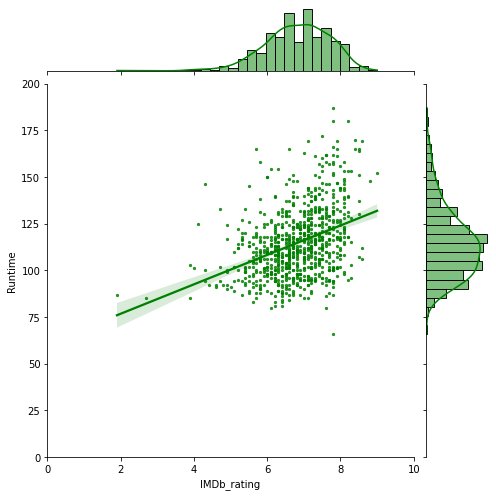

In [583]:
runtime_IMDbrating = sns.jointplot(x="IMDb_rating", y="Runtime", data=movies,
                  kind="reg",
                  xlim=(0, 10), ylim=(0, 200),
                  scatter_kws={"s": 5},
                  color="g", height=7)

In [584]:
movies['IMDb_rating'].corr(movies['Runtime'])

0.3745657962150345

#### It can be seen that there is some sort of positive correlation between the two variables, although it's not close to being perfect.

#### The hypothesis 'Does the length of movies (in minutes) have a positive impact on the IMDb ratings?' is rejected, as there is a weak correlation between the two variables.
#### Correlation coefficient = 0.37 (weak correlation).

## 3.2. Is there a strong relation between the IMDb rating and Metascore?

### 3.2.1. Tesing to see the correlation between the IMDb rating and the Metascore.

<AxesSubplot:xlabel='IMDb_rating', ylabel='Metascore'>

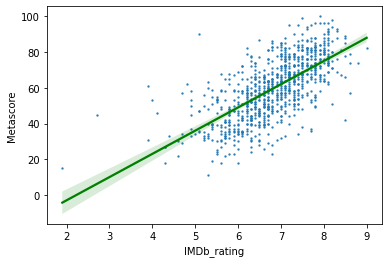

In [585]:
sns.regplot(data=movies, x='IMDb_rating', y='Metascore', scatter_kws={"s": 2}, line_kws={'color': 'green'})

In [586]:
movies['IMDb_rating'].corr(movies['Metascore'])

0.6727311464226439

#### There is a moderately strong positive correlation between IMDb rating and Metascore (correlation coefficient = 0.67).

## 3.3. Is there a positive correlation between the number of votes and the revenue (in millions?)

### 3.3.1. Testing to see the correlation between the number of votes and revenue.

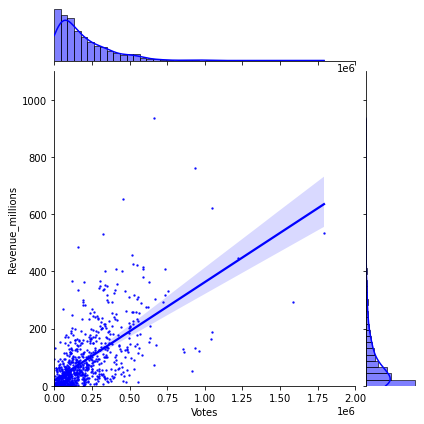

In [587]:
Revenue_Votes = sns.jointplot(x="Votes", y="Revenue_millions", data=movies,
                  kind="reg",
                  xlim=(0, 2000000), ylim=(0, 1100),
                  scatter_kws={"s": 2},
                  color="b", height=6)

In [588]:
movies['Votes'].corr(movies['Revenue_millions'])

0.6368332506700011

#### There is also a moderately strong positive correlation (0.64) between the Revenue and the number of votes,
#### It appears that the number of votes indicate the popularity of a movie, and popular movies tend to generate more revenue.

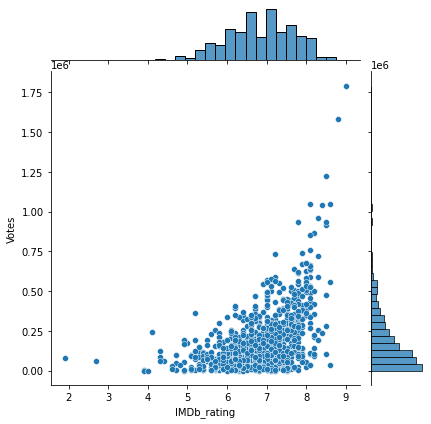

In [589]:
sns.jointplot(data=movies, x='IMDb_rating', y='Votes')

## 3.4. Did the most popular director in each of the following year intervals: 2006 to 2009; 2010 - 2016 (taking into consideration IMDd rating and the count of the votes) generated the most revenue?

### 3.4.1. Displaying top 10 highest revenue movie titles.

<AxesSubplot:xlabel='Revenue_millions', ylabel='Title'>

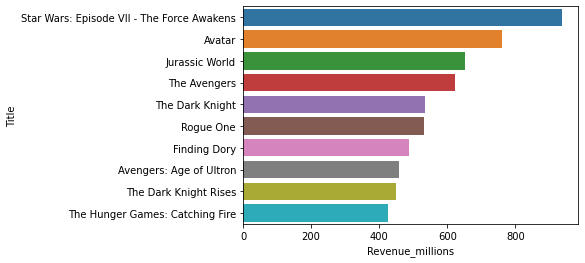

In [590]:
topRevenue = movies.nlargest(10,'Revenue_millions')[['Title','Revenue_millions']].set_index('Title')
topRevenue
sns.barplot(x='Revenue_millions',y=topRevenue.index,data=topRevenue)

### 3.4.2. Finding out the percentage sizes of how many movies were created in every year.

In [591]:
movies['Year'].value_counts(normalize=True) * 100

2016    23.627685
2015    13.007160
2014    11.097852
2013    10.023866
2012     7.398568
2011     6.801909
2010     6.801909
2008     5.727924
2009     5.369928
2007     5.250597
2006     4.892601
Name: Year, dtype: float64

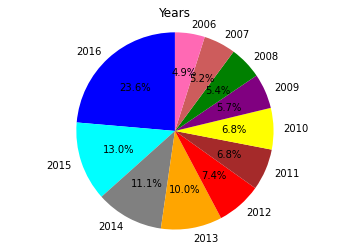

In [592]:
# x = '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007', '2006'
labels = '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007', '2006'
sizes = [23.63, 13.00, 11.09, 10.03, 7.40, 6.81, 6.80, 5.73, 5.37, 5.25, 4.89]
# explode = [0, 0, 0, 0, 0, 0, 0, 0.1, 0.1, 0.1, 0.1]
colors = ('blue', 'cyan', 'gray','orange', 'red', 'brown', 'yellow', 'purple', 'green', 'indianred', 'hotpink')
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct = '%1.1f%%', startangle=90)
ax.axis('equal')
ax.set_title('Years')
plt.show()

In [593]:
# It appears that most of the movies (23.63%) were created in 2016.

### 3.4.3. Testing to see if the most popular director in the given time intervals (taking into account IMDb rating and the count of the votes) also generatef the most revenue?

In [594]:
movies[movies['Year'].isin(range(2006,2010)) & (movies['IMDb_rating'] >= 8.5) & (movies['Votes'] >= 900000)]


 # Between years 2006 to 2010 Christopher Nolan created 2 out of 3 movies, with IMDb rating being >= 8.5 and number of votes being >= 900k.
 # I have decided to choose votes >= 900k for the hypothesis to be more solid. Comparing movies with a huge difference in the number of votes would not be a strong indicator.

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,IMDb_rating,Votes,Revenue_millions,Metascore,Title_words,IMDb_rating_Metascore
54,55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0,3,91.0
64,65,The Prestige,"Drama,Mystery,Sci-Fi",Two stage magicians engage in competitive one-...,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,8.5,913152,53.08,66.0,2,74.5
99,100,The Departed,"Crime,Drama,Thriller",An undercover cop and a mole in the police att...,Martin Scorsese,"Leonardo DiCaprio, Matt Damon, Jack Nicholson,...",2006,151,8.5,937414,132.37,85.0,2,93.5


In [595]:
movies[movies['Year'].isin(range(2010,2017)) & (movies['IMDb_rating'] >= 8.5) & (movies['Votes'] >= 900000)]

# Between years 2010 and 2016 Christopher Nolan created 3/3 movies with IMDb rating >= 8.5 and number of votes >= 900k.

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,IMDb_rating,Votes,Revenue_millions,Metascore,Title_words,IMDb_rating_Metascore
36,37,Interstellar,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0,1,82.6
80,81,Inception,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0,1,82.8
124,125,The Dark Knight Rises,"Action,Thriller",Eight years after the Joker's reign of anarchy...,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",2012,164,8.5,1222645,448.13,78.0,4,86.5


In [596]:
movies[movies['Director'] == 'Christopher Nolan']

# Between the years 2006 - 2016 Christopher Noland created 5 movies in total, and every single one of them made it to the list of best rated movies (in terms of IMDd rating and the number of votes).

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,IMDb_rating,Votes,Revenue_millions,Metascore,Title_words,IMDb_rating_Metascore
36,37,Interstellar,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0,1,82.6
54,55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0,3,91.0
64,65,The Prestige,"Drama,Mystery,Sci-Fi",Two stage magicians engage in competitive one-...,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,8.5,913152,53.08,66.0,2,74.5
80,81,Inception,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0,1,82.8
124,125,The Dark Knight Rises,"Action,Thriller",Eight years after the Joker's reign of anarchy...,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",2012,164,8.5,1222645,448.13,78.0,4,86.5


## Among the 6 best films of the decade (out of 838) in terms of IMDb rating and number of the votes, Christopher Nolan is the most popular director, who created 5 out of 6 best rated movies.

### 3.4.4. Testing to see if the most popular director of the decade (Christopher Noland) also generated the most revenue.

In [597]:
grouped = movies.groupby(['Director'])['Revenue_millions'].sum().sort_values(ascending=False)
grouped

# Hypothesis, if the most popular director of the decade - Christopher Nolan (in terms of IMDb rating and the number of votes) generated the most revenue is denied.
# Christopher Nolan ranks 3rd out of 524 unique directors with the amount of generated revenue being 1515 million dollars.

Director
J.J. Abrams          1683.45
David Yates          1630.51
Christopher Nolan    1515.09
Michael Bay          1421.32
Francis Lawrence     1299.81
                      ...   
Gus Van Sant            0.02
Robin Swicord           0.01
So Yong Kim             0.01
Patricia Rozema         0.01
Andy Goddard            0.00
Name: Revenue_millions, Length: 524, dtype: float64

## Hypothesis, if the most popular director of the decade (Christopher Nolan) generated the most revenue is denied.
## Christopher Nolan ranks 3rd out of 524 unique directors with 1515 million dollars of generated revenue.

In [598]:
movies[movies['Director'] == 'J.J. Abrams']

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,IMDb_rating,Votes,Revenue_millions,Metascore,Title_words,IMDb_rating_Metascore
50,51,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,81.0,8,89.1
140,141,Star Trek,"Action,Adventure,Sci-Fi",The brash James T. Kirk tries to live up to hi...,J.J. Abrams,"Chris Pine, Zachary Quinto, Simon Pegg, Leonar...",2009,127,8.0,526324,257.70,82.0,2,90.0
362,363,Star Trek Into Darkness,"Action,Adventure,Sci-Fi",After the crew of the Enterprise find an unsto...,J.J. Abrams,"Chris Pine, Zachary Quinto, Zoe Saldana, Bened...",2013,132,7.8,417663,228.76,72.0,4,79.8
497,498,Super 8,"Mystery,Sci-Fi,Thriller","During the summer of 1979, a group of friends ...",J.J. Abrams,"Elle Fanning, AJ Michalka, Kyle Chandler, Joel...",2011,112,7.1,298913,126.98,72.0,2,79.1
869,870,Mission: Impossible III,"Action,Adventure,Thriller",Agent Ethan Hunt comes into conflict with a da...,J.J. Abrams,"Tom Cruise, Michelle Monaghan, Ving Rhames, Ph...",2006,126,6.9,270429,133.38,66.0,3,72.9


#### Director (J.J. Abrams) generated the most revenue during the decade (2006-2016). However, none of his movies surpassed any of the Christopher Nolan's movies in terms of IMDb ratings.

In [599]:
print(movies['Director'].value_counts().idxmax()) # Director who appeared the most.
movies[movies['Director'] == 'Ridley Scott']

Ridley Scott


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,IMDb_rating,Votes,Revenue_millions,Metascore,Title_words,IMDb_rating_Metascore
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,1,72.0
102,103,The Martian,"Adventure,Drama,Sci-Fi",An astronaut becomes stranded on Mars after hi...,Ridley Scott,"Matt Damon, Jessica Chastain, Kristen Wiig, Ka...",2015,144,8.0,556097,228.43,80.0,2,88.0
387,388,Robin Hood,"Action,Adventure,Drama","In 12th century England, Robin and his band of...",Ridley Scott,"Russell Crowe, Cate Blanchett, Matthew Macfady...",2010,140,6.7,221117,105.22,53.0,2,59.7
470,471,American Gangster,"Biography,Crime,Drama","In 1970s America, a detective works to bring d...",Ridley Scott,"Denzel Washington, Russell Crowe, Chiwetel Eji...",2007,157,7.8,337835,130.13,76.0,2,83.8
516,517,Exodus: Gods and Kings,"Action,Adventure,Drama",The defiant leader Moses rises up against the ...,Ridley Scott,"Christian Bale, Joel Edgerton, Ben Kingsley, S...",2014,150,6.0,137299,65.01,52.0,4,58.0
521,522,The Counselor,"Crime,Drama,Thriller",A lawyer finds himself in over his head when h...,Ridley Scott,"Michael Fassbender, Penélope Cruz, Cameron Dia...",2013,117,5.3,84927,16.97,48.0,2,53.3
530,531,A Good Year,"Comedy,Drama,Romance",A British investment broker inherits his uncle...,Ridley Scott,"Russell Crowe, Abbie Cornish, Albert Finney, M...",2006,117,6.9,74674,7.46,47.0,3,53.9
737,738,Body of Lies,"Action,Drama,Romance",A CIA agent on the ground in Jordan hunts down...,Ridley Scott,"Leonardo DiCaprio, Russell Crowe, Mark Strong,...",2008,128,7.1,182305,39.38,57.0,3,64.1


## Hypothesis: If the most popular director (according to IMDb ranking and the number of votes) generated the most revenue is rejected.
## Christopher Nolan ranks 3rd from 524 unique directors.

## 2.5.  Did the most popular genre generated the most revenue in the period 2006-2016?

### 2.5.1. Finding the most popular genre.

In [600]:
movies['Genre'] # Need to filter to obtain the main genre of every movie

0       Action,Adventure,Sci-Fi
1      Adventure,Mystery,Sci-Fi
2               Horror,Thriller
3       Animation,Comedy,Family
4      Action,Adventure,Fantasy
                 ...           
993     Action,Adventure,Horror
994                      Comedy
996                      Horror
997         Drama,Music,Romance
999       Comedy,Family,Fantasy
Name: Genre, Length: 838, dtype: object

In [601]:
new = movies['Genre'].str.split(",", n = 2, expand = True)
new[0].info()
# Naudosime 0 stulpelį, nes jame visos reikšmės užpildytos (pagrindiniai žanrai),
# stulpeliuose 1 ir 2 žanrai gali ir neegzistuoti, tad naudosiu tik pagrindinius žanrus.

<class 'pandas.core.series.Series'>
Int64Index: 838 entries, 0 to 999
Series name: 0
Non-Null Count  Dtype 
--------------  ----- 
838 non-null    object
dtypes: object(1)
memory usage: 45.4+ KB


In [602]:
movies['Main_genres'] = new[0] # Adding a new column to show the main ganre of a movie

/var/folders/d0/hq4rwgj90r72xzxl8829mkn00000gn/T/ipykernel_44280/584547605.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['Main_genres'] = new[0] # Adding a new column to show the main ganre of a movie


In [603]:
movies.head(2)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,IMDb_rating,Votes,Revenue_millions,Metascore,Title_words,IMDb_rating_Metascore,Main_genres
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,4,84.1,Action
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,1,72.0,Adventure


In [604]:
movies['Main_genres'].value_counts().idxmax() # Most popular genre

'Action'

### 2.5.2. Testing if the most popular genre (Action), generated the most revenue.

In [605]:
movies[movies['Main_genres'] == 'Action']

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,IMDb_rating,Votes,Revenue_millions,Metascore,Title_words,IMDb_rating_Metascore,Main_genres
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,4,84.1,Action
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,2,46.2,Action
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0,3,48.1,Action
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0,5,85.1,Action
12,13,Rogue One,"Action,Adventure,Sci-Fi",The Rebel Alliance makes a risky move to steal...,Gareth Edwards,"Felicity Jones, Diego Luna, Alan Tudyk, Donnie...",2016,133,7.9,323118,532.17,65.0,2,72.9,Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
954,955,Death Race,"Action,Sci-Fi,Thriller",Ex-con Jensen Ames is forced by the warden of ...,Paul W.S. Anderson,"Jason Statham, Joan Allen, Tyrese Gibson, Ian ...",2008,105,6.4,173731,36.06,43.0,2,49.4,Action
956,957,Legion,"Action,Fantasy,Horror",When a group of strangers at a dusty roadside ...,Scott Stewart,"Paul Bettany, Dennis Quaid, Charles S. Dutton,...",2010,100,5.2,84158,40.17,32.0,1,37.2,Action
958,959,3 Days to Kill,"Action,Drama,Thriller",A dying CIA agent trying to reconnect with his...,McG,"Kevin Costner, Hailee Steinfeld, Connie Nielse...",2014,117,6.2,73567,30.69,40.0,4,46.2,Action
990,991,Underworld: Rise of the Lycans,"Action,Adventure,Fantasy",An origins story centered on the centuries-old...,Patrick Tatopoulos,"Rhona Mitra, Michael Sheen, Bill Nighy, Steven...",2009,92,6.6,129708,45.80,44.0,5,50.6,Action


In [606]:
groupsies = movies.groupby(['Main_genres'])['Revenue_millions'].sum()
groupsies

Main_genres
Action       33403.82
Adventure     7998.02
Animation     8656.18
Biography     3148.82
Comedy        7968.51
Crime         2215.06
Drama         5156.58
Fantasy        126.22
Horror        1398.13
Mystery        708.17
Sci-Fi          85.27
Thriller         0.32
Name: Revenue_millions, dtype: float64

#### Hypothesis confirmed, the most popular genre (Action), (268/838 movies), generated the most revenue (33403.82 million).

#### 2.5.3. Comparison of movies that generated the most/the least revenue.

In [607]:
tmp_revenue = movies.set_index('Revenue_millions')
tmp_ascending = tmp_revenue.sort_index(ascending=False)
tmp_ascending
movies = tmp_ascending = tmp_ascending.reset_index()
movies.loc[0]

# Star Wars: Episode VII - The Force Awakens generated the most revenue (936.63 million).

Revenue_millions                                                    936.63
Rank                                                                    51
Title                           Star Wars: Episode VII - The Force Awakens
Genre                                             Action,Adventure,Fantasy
Description              Three decades after the defeat of the Galactic...
Director                                                       J.J. Abrams
Actors                   Daisy Ridley, John Boyega, Oscar Isaac, Domhna...
Year                                                                  2015
Runtime                                                                136
IMDb_rating                                                            8.1
Votes                                                               661608
Metascore                                                             81.0
Title_words                                                              8
IMDb_rating_Metascore    

In [608]:
movies.tail(1)

# 'A Kind of Murder' generated the least revenue (0.00 million).

,Revenue_millions,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,IMDb_rating,Votes,Metascore,Title_words,IMDb_rating_Metascore,Main_genres
837,0.0,232,A Kind of Murder,"Crime,Drama,Thriller","In 1960s New York, Walter Stackhouse is a succ...",Andy Goddard,"Patrick Wilson, Jessica Biel, Haley Bennett, V...",2016,95,5.2,3305,50.0,4,55.2,Crime


In [609]:
movies[movies['Title'].isin(['A Kind of Murder', 'Star Wars: Episode VII - The Force Awakens'])]

,Revenue_millions,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,IMDb_rating,Votes,Metascore,Title_words,IMDb_rating_Metascore,Main_genres
0,936.63,51,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,81.0,8,89.1,Action
837,0.00,232,A Kind of Murder,"Crime,Drama,Thriller","In 1960s New York, Walter Stackhouse is a succ...",Andy Goddard,"Patrick Wilson, Jessica Biel, Haley Bennett, V...",2016,95,5.2,3305,50.0,4,55.2,Crime


#### The movie that generated the most revenue is in the most popular genre category: Action, while the movie that generated the least revenue is in the 6th most popular category.
#### Runtime is siginificantly larger in J.J. Abrams's movie, as well as the IMDb rating, Metaschore. It also has 200 ties more number of votes.
#### However, there is a positive correlation between the number of votes and revenue, hence the outcome is not surprising.
#### To sum up, the movie that generated the most revenue has significantly more votes, is ranked higher by both IMDb ratings and Metascore and the length of the movie is larger as well.

# 2.6. Does the actor (actress) who appeared the most times tend to appear in movies ranked higher?

In [610]:
movies['Actors']

# Column 'Actors' contains multiple lists of actors, hence we need to obtain individual values of the actors.

0      Daisy Ridley, John Boyega, Oscar Isaac, Domhna...
1      Sam Worthington, Zoe Saldana, Sigourney Weaver...
2      Chris Pratt, Bryce Dallas Howard, Ty Simpkins,...
3      Robert Downey Jr., Chris Evans, Scarlett Johan...
4      Christian Bale, Heath Ledger, Aaron Eckhart,Mi...
                             ...                        
833    Riley Keough, Jena Malone, Jessie Ok Gray, Car...
834    Bryan Cranston, Jennifer Garner, Beverly D'Ang...
835    Lily Collins, Sam Claflin, Christian Cooke, Ja...
836    Ellen Page, Evan Rachel Wood, Max Minghella,Ca...
837    Patrick Wilson, Jessica Biel, Haley Bennett, V...
Name: Actors, Length: 838, dtype: object

In [611]:
movies['Actors'] = movies['Actors'].str.split(',')

In [612]:
unique_actors = []
for actor in movies['Actors']:
    for a in actor:
        if a not in unique_actors:
            unique_actors.append(a)

In [613]:
unique_actors[1:10] # Making the shown output shorter, as there are a lot of unique values.

[' John Boyega',
 ' Oscar Isaac',
 ' Domhnall Gleeson',
 'Sam Worthington',
 ' Zoe Saldana',
 ' Sigourney Weaver',
 ' Michelle Rodriguez',
 'Chris Pratt',
 ' Bryce Dallas Howard']

In [614]:
movies['Actors'] = movies['Actors'].apply(lambda x:x[0])

In [615]:
movies['Actors'].value_counts() # Actors that appeared the most times are Mark Wahlberg and Christian Bale.

Mark Wahlberg        11
Christian Bale       11
Jake Gyllenhaal       9
Leonardo DiCaprio     9
Brad Pitt             9
                     ..
Aaron Paul            1
Mark Ruffalo          1
Jared Gilman          1
Rhona Mitra           1
Riley Keough          1
Name: Actors, Length: 431, dtype: int64

In [616]:
ac_rev = movies[movies['Actors'].isin(['Mark Wahlberg', 'Christian Bale'])]

In [617]:
ac_rev_grouped = ac_rev.groupby(['Actors'])[['Revenue_millions']].sum()

In [618]:
ac_rev_grouped

,Revenue_millions
Actors,
Christian Bale,1559.62
Mark Wahlberg,1052.09


#### Most popular actors: Christian Bale and Mark Wahlberg have been in movies that generated 1559.62 and 1052.09 million dollars.

In [619]:
from sklearn import linear_model

In [620]:
import mysql.connector

mydb = mysql.connector.connect(
    host='localhost',
    port='3306',
    user='root',
    password='Labutis1997*'
)
cursor = mydb.cursor()
cursor.execute('USE sakila')
df = pd.read_sql('SELECT * FROM actor', con=mydb)
df

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,actor_id,first_name,last_name,last_update
0,1,PENELOPE,GUINESS,2006-02-15 04:34:33
1,2,NICK,WAHLBERG,2006-02-15 04:34:33
2,3,ED,CHASE,2006-02-15 04:34:33
3,4,JENNIFER,DAVIS,2006-02-15 04:34:33
4,5,JOHNNY,LOLLOBRIGIDA,2006-02-15 04:34:33
...,...,...,...,...
195,196,BELA,WALKEN,2006-02-15 04:34:33
196,197,REESE,WEST,2006-02-15 04:34:33
197,198,MARY,KEITEL,2006-02-15 04:34:33
198,199,JULIA,FAWCETT,2006-02-15 04:34:33


In [622]:
movies.to_csv('movies_newest.csv')
movies.to_excel('movies_finalinis.xlsx')

In [623]:
from PIL import Image, ImageFilter